In [3]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),os.pardir,'src','data'))
from load_preprocess_data import load_raw_complaints_data
import altair as alt
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
data_path = os.path.join(os.pardir, "data", "raw", "complaints.csv")

complaints_df = load_raw_complaints_data(data_path)
complaints_df = complaints_df.query('not consumer_disputed.isnull()')
complaints_df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
115,2016-10-21,Credit card,NaN,Other,NaN,On XX/XX/2016 a deposit in the amount of {$150...,NaN,AMERICAN EXPRESS COMPANY,NY,14580.0,NaN,Consent provided,Web,2016-10-25,Closed with monetary relief,Yes,Yes,2172679
2301,2015-12-10,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,Please stop the Default / foreclosure process ...,NaN,NATIONSTAR MORTGAGE,CA,92142.0,NaN,Consent provided,Web,2015-12-10,Closed with explanation,Yes,Yes,1691917
3935,2016-03-19,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,I 've been having several issues with SNAAC wh...,Company has responded to the consumer and the ...,Security National Automotive Acceptance,GA,31315.0,Servicemember,Consent provided,Web,2016-03-25,Closed with explanation,Yes,No,1840418
4188,2015-05-07,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,1. Mortgage sold by XXXX XXXX XXXX to the XXXX...,NaN,NATIONSTAR MORTGAGE,CA,90028.0,Older American,Consent provided,Web,2015-05-07,Closed with explanation,Yes,Yes,1364576
4538,2016-09-27,Bank account or service,Checking account,Problems caused by my funds being low,NaN,I have a checking and savings account with Wel...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,8098.0,NaN,Consent provided,Web,2016-09-27,Closed with explanation,No,No,2133127


In [69]:
product_disp = round(complaints_df["product"].value_counts() / len(complaints_df["product"]) * 100,2).to_frame()
product_disp['Product Name'] = product_disp.index

x = alt.Chart(product_disp, title='Products with Highest Disputes').mark_bar().encode(
    x=alt.X('product', title='Percentage'),
    y=alt.Y('Product Name', sort='x')
)

x + x.mark_text(align = 'center', 
    baseline = 'bottom', 
    dx = 14,
    dy = 5, 
    fontSize = 10,).encode(
    text = alt.Text('product:Q', format='.2f')
)

/Users/DhruviNishar/opt/miniconda3/envs/571/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

Comparing the Most common words in issues between disputed and undisputed consumers:


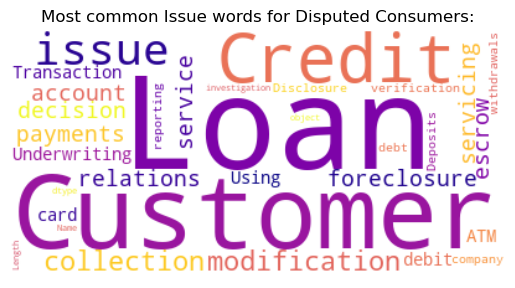

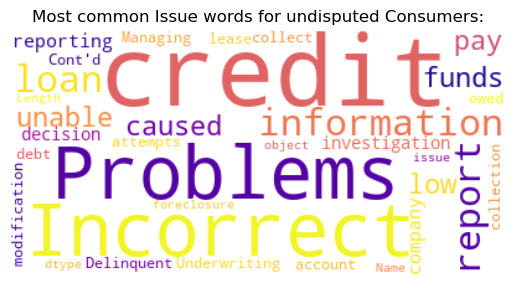

In [19]:
stopwords = set(STOPWORDS)
disputed_words = str(complaints_df['issue'].loc[complaints_df['consumer_disputed'] == 'Yes'])
undisputed_words = str(complaints_df['issue'].loc[complaints_df['consumer_disputed'] == 'No'])
print("\033[1mComparing the Most common words in issues between disputed and undisputed consumers:\033[0m")

plt.title("Most common Issue words for Disputed Consumers:")
wordcloud = WordCloud(background_color="white", collocations=False, colormap='plasma', max_words=100).generate(disputed_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.title("Most common Issue words for undisputed Consumers:")
wordcloud = WordCloud(background_color="white", collocations=False, colormap='plasma', max_words=100).generate(undisputed_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [96]:
state_wise.consumer_disputed

state
AA       3
AE      57
AK     161
AL    1514
AP      50
      ... 
VT     230
WA    3201
WI    1631
WV     352
WY     143
Name: consumer_disputed, Length: 62, dtype: int64

In [99]:
state_wise = complaints_df[complaints_df['consumer_disputed'] == 'Yes'][['state', 'consumer_disputed']].groupby(['state']).count()
# fig = px.choropleth(state_wise, 
#                     scope='usa', 
#                     locationmode='USA-states',
#                     color=state_wise['consumer_disputed'], 
#                     hover_name="consumer_disputed",
#                     color_continuous_scale="Viridis_r")
# fig.show()

In [100]:
import geopandas
state_wise = geopandas(state_wise)
state_wise

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
df_boa = pd.DataFrame(cross_month['Bank of America']).reset_index().sort_values(by="Bank of America", ascending=False).round(2)
df_boa = df_boa.rename(columns={'Bank of America': 'share of complaints'})

for col in df_boa.columns:
    df_boa[col] = df_boa[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_boa['text'] = "State Code: " + df_boa['state'] + '<br>'


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_boa['state'],
        z = df_boa['share of complaints'], 
        locationmode = 'USA-states',
        text = df_boa['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]

layout = dict(
    title = 'Most Complaints by State <br> Bank of America',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [101]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 209.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 170.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 83.0 kB/s eta 0:00:0000:0100:03m
     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 11.0/26.5 MB 110.6 kB/s eta 0:02:21